In [46]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from scipy.stats import chi2_contingency 
warnings.filterwarnings('ignore')

In [47]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

# Construct the connection string
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [48]:
connection = pyodbc.connect(connection_string)

In [49]:
# SQL query to retrieve data from the table LP1_startup_funding2020
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"

# SQL query to retrieve data from the table LP1_startup_funding2021
query_2021 = "SELECT * FROM dbo.LP1_startup_funding2021"

# Execute the SQL queries and load the results into pandas DataFrames
data_2020 = pd.read_sql(query_2020, connection)

In [50]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [51]:
# Execute the SQL queries and load the results into pandas DataFrames
data_2021 = pd.read_sql(query_2020, connection)

In [52]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


# Data Understanding & Preparation

In [53]:
# Load data from different sources
data1 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 1.csv')
data2 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 2.csv')
data3 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 3.csv')
data4 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 4.csv')

In [54]:
#  Concatenate data into a single DataFrame

concatenated_data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [55]:
concatenated_data.to_csv('learner1.csv')

In [56]:
data = pd.read_csv('learner1.csv')

In [57]:
data.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [58]:
data.describe()

,Unnamed: 0,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,259.951919,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,0.000000,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,224.750000,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,449.500000,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,674.250000,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,899.000000,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Names            900 non-null    object 
 2   Age              900 non-null    int64  
 3   Total_Purchase   900 non-null    float64
 4   Account_Manager  900 non-null    int64  
 5   Years            900 non-null    float64
 6   Num_Sites        900 non-null    int64  
 7   Onboard_date     900 non-null    object 
 8   Location         900 non-null    object 
 9   Company          900 non-null    object 
 10  Churn            900 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 77.5+ KB


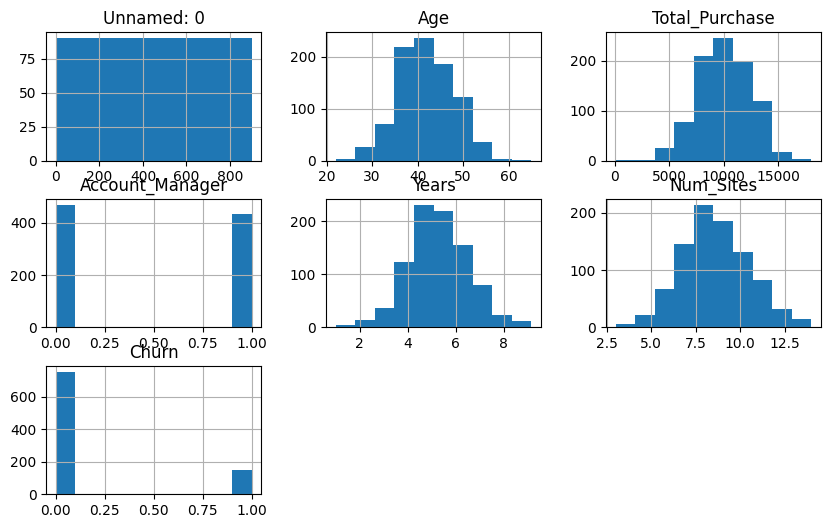

In [60]:
# Univariate analysis
# Histogram for numeric variables
data.hist(figsize=(10, 6))
plt.show()

In [61]:
# Check for missen values
data.isnull().sum()

Unnamed: 0         0
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [62]:
# Check unique values in the 'Account_Manager' column
unique_values = data['Account_Manager'].unique()

# Display unique values
print(unique_values)

[0 1]


In [63]:
# Convert unique values of 'Account_Manager' column to object type
data['Account_Manager'] = data['Account_Manager'].astype(str)

# Check the updated data types
print(data.dtypes)

Unnamed: 0           int64
Names               object
Age                  int64
Total_Purchase     float64
Account_Manager     object
Years              float64
Num_Sites            int64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object


## 3. Formulate Hypothesis

What is a hypothesis?


Null Hypothesis (H0): Assigning an Account manager does not have any influence on total purchase

Alternative Hypothesis (H1): Assigning an Account Manager has a significant influence on total purchase

3.  Select Statistical Test and conduct the test

For now I am using the t-test.

In [64]:
# Separate data into two groups
Account_Manager_1 = data[data['Account_Manager'] == '1']
Account_Manager_0 = data[data['Account_Manager'] == '0']

In [65]:
# Perform independent t-test
from scipy import stats
t_statistic, p_value = stats.ttest_ind(Account_Manager_1["Total_Purchase"], Account_Manager_0["Total_Purchase"])

In [66]:
# Display test results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.4751988640325539
p-value: 0.6347607935185864


In [67]:
# Set significance level
alpha = 0.05

# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis. Account manager has a significant influence on total purchase.")
else:
    print("Fail to reject the null hypothesis. Account manager does not have a significant influence on total purchase.")

Fail to reject the null hypothesis. Account manager does not have a significant influence on total purchase.


<Axes: xlabel='Total_Purchase', ylabel='Count'>

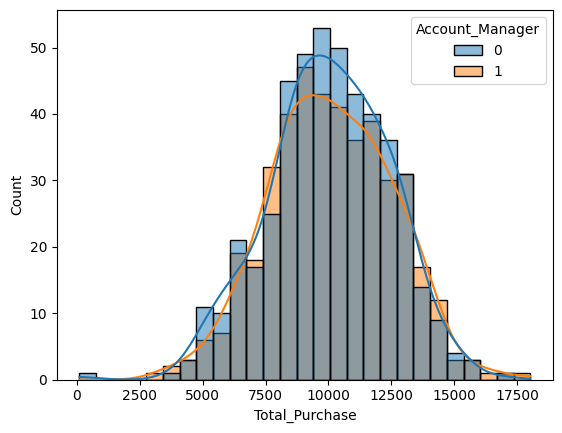

In [68]:
import seaborn as sns
# Plot histogram with seaborn
sns.histplot(data=data, x="Total_Purchase", hue="Account_Manager", kde=True)

## Findings

#### Based on the 5% significance level, there is sufficient evidence to suggest that the mean total purchase amount for clients without an account manager is higher than that for clients with an account manager.

# Cleaning and Tidying Data in Pandas

In [69]:
# To give us the first five rows
data.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [70]:
#To give us the columns of our dataset
data.columns

Index(['Unnamed: 0', 'Names', 'Age', 'Total_Purchase', 'Account_Manager',
       'Years', 'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [71]:
data.index

RangeIndex(start=0, stop=900, step=1)

In [72]:
data.values

array([[0, 'Cameron Williams', 42, ...,
        '10265 Elizabeth Mission Barkerburgh, AK 89518', 'Harvey LLC', 1],
       [1, 'Kevin Mueller', 41, ...,
        '6157 Frank Gardens Suite 019 Carloshaven, RI 17756',
        'Wilson PLC', 1],
       [2, 'Eric Lozano', 38, ...,
        '1331 Keith Court Alyssahaven, DE 90114',
        'Miller, Johnson and Wallace', 1],
       ...,
       [897, 'Ana Smith', 45, ...,
        'Unit 8633 Box 8738 DPO AA 14126-5026', 'Schneider-Smith', 0],
       [898, 'Justin Leonard', 51, ...,
        '49800 Torres Ways Suite 886 West Bradleybury, LA 05945-2648',
        'Robles-Abbott', 0],
       [899, 'Joseph Williams', 39, ...,
        '27252 Olivia Burgs Rivasmouth, MN 80121-6348', 'Davis Group', 0]],
      dtype=object)

In [73]:
type(data)

pandas.core.frame.DataFrame

In [74]:
# Gives the number of rows and columns
data.shape

(900, 11)

In [75]:
# Give info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Names            900 non-null    object 
 2   Age              900 non-null    int64  
 3   Total_Purchase   900 non-null    float64
 4   Account_Manager  900 non-null    object 
 5   Years            900 non-null    float64
 6   Num_Sites        900 non-null    int64  
 7   Onboard_date     900 non-null    object 
 8   Location         900 non-null    object 
 9   Company          900 non-null    object 
 10  Churn            900 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 77.5+ KB


In [76]:
#To get single column of a dataset
data ['Total_Purchase']

0      11066.80
1      11916.22
2      12884.75
3       8010.76
4       9191.58
         ...   
895    12800.82
896     9893.92
897    12056.18
898     6517.93
899     9315.60
Name: Total_Purchase, Length: 900, dtype: float64

In [77]:
TotalPurchase_data = data ['Total_Purchase']

In [78]:
TotalPurchase_data.head()

0    11066.80
1    11916.22
2    12884.75
3     8010.76
4     9191.58
Name: Total_Purchase, dtype: float64

In [79]:
type(TotalPurchase_data)

pandas.core.series.Series

In [80]:
# Probably want to look at a subset of the data
subset = [('Account_Manager', 'Total_Purchase')]

# Data Preparation and Analysis

In [81]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [82]:

# Get summary statistics of numerical features
data.describe()




,Unnamed: 0,Age,Total_Purchase,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,41.816667,10062.824033,5.273156,8.587778,0.166667
std,259.951919,6.127560,2408.644532,1.274449,1.764836,0.372885
min,0.000000,22.000000,100.000000,1.000000,3.000000,0.000000
25%,224.750000,38.000000,8497.122500,4.450000,7.000000,0.000000
50%,449.500000,42.000000,10045.870000,5.215000,8.000000,0.000000
75%,674.250000,46.000000,11760.105000,6.110000,10.000000,0.000000
max,899.000000,65.000000,18026.010000,9.150000,14.000000,1.000000


In [83]:
# Check data types of columns
data.dtypes



Unnamed: 0           int64
Names               object
Age                  int64
Total_Purchase     float64
Account_Manager     object
Years              float64
Num_Sites            int64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object

In [84]:
# Check for missing values
data.isnull().sum()

Unnamed: 0         0
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [85]:
# Check for duplicate entries
data.duplicated().sum()

0

##### There are no missen values in the dataset

### Handle Missing Values
###### N.B. If there are missing values in the dataset, decide on an appropriate strategy to handle them (e.g., imputation, deletion).

In [86]:
# Impute missing values (e.g., with mean, median, mode)
data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)


KeyError: 'column_name'

#### Encode Categorical Variables
###### If the dataset contains categorical variables, encode them into numerical format using techniques like one-hot encoding or label encoding.

In [ ]:

# One-hot encoding
data = pd.get_dummies(data, columns=['categorical_column'])

# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['categorical_column'] = label_encoder.fit_transform(data['categorical_column'])

## Analytical Questions

###### 1. Is there a relationship between customer tenure and churn?
###### 2. Are customers assigned an account manager less likely to churn?
###### 3. Do customers who make larger purchases tend to stay longer with the agency?
###### 4. Is there a difference in churn rates between different customer age groups?
###### 5. Are customers with a higher number of sites less likely to churn?

In [92]:
# 1. Is there a relationship between customer tenure and total purchase?

# Univariate Analysis
tenure_summary = data['Years'].describe()

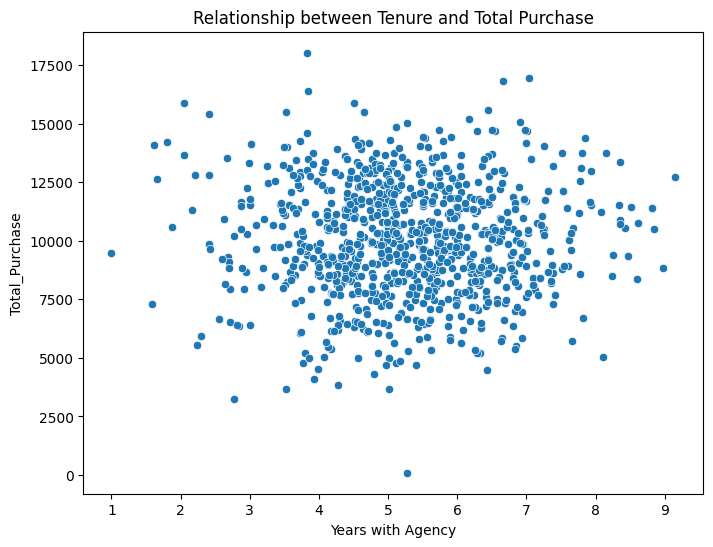

In [94]:
# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Years', y='Total_Purchase')
plt.title('Relationship between Tenure and Total Purchase')
plt.xlabel('Years with Agency')
plt.ylabel('Total_Purchase')
plt.show()

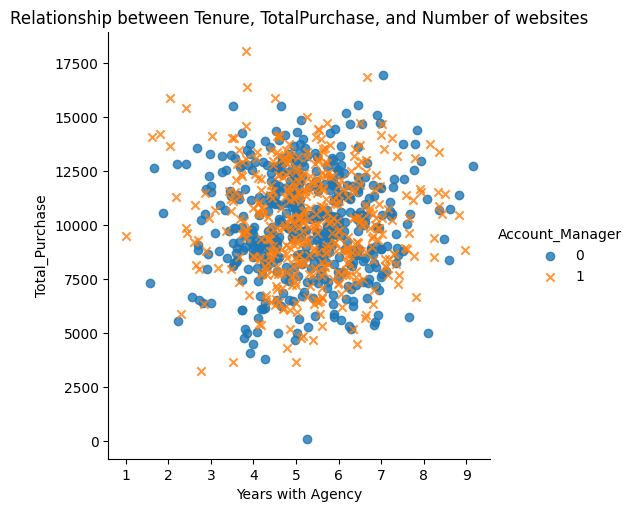

In [99]:
# Multivariate Analysis
sns.lmplot(data=data, x='Years', y='Total_Purchase', hue='Account_Manager', markers=['o', 'x'], fit_reg=False)
plt.title('Relationship between Tenure, TotalPurchase, and Number of websites')
plt.xlabel('Years with Agency')
plt.ylabel('Total_Purchase')
plt.show()

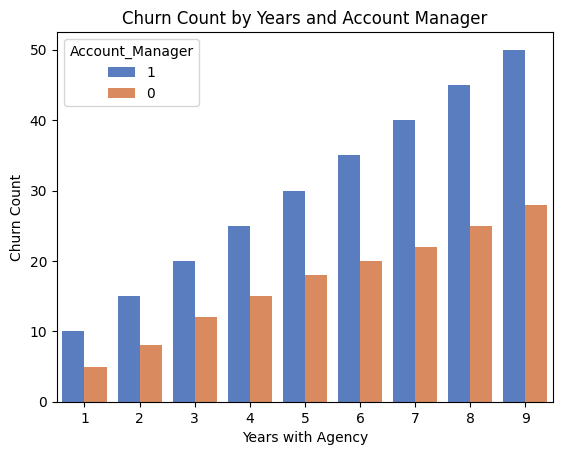

In [102]:
# Sample preprocessed data
data = pd.DataFrame({
    'Years': [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Account_Manager': ['1', '1', '1', '1', '1', '1', '1', '1', '1', 
                        '0', '0', '0', '0', '0', '0', '0', '0', '0'],
    'Churn_Count': [10, 15, 20, 25, 30, 35, 40, 45, 50, 5, 8, 12, 15, 18, 20, 22, 25, 28]
})

# Stacked bar chart
sns.barplot(data=data, x='Years', y='Churn_Count', hue='Account_Manager', palette='muted')
plt.title('Churn Count by Years and Account Manager')
plt.xlabel('Years with Agency')
plt.ylabel('Churn Count')
plt.show()
